In [1]:
import numpy as np
from library_dicom.dicom_processor.tools.create_mip import *
import matplotlib.pyplot as plt
import SimpleITK as sitk  
#from radiomics.featureextractor import *
from sklearn import mixture
from skimage.feature import peak_local_max
from skimage import segmentation

from library_dicom.post_processing.PostProcess_Reader import PostProcess_Reader
from library_dicom.post_processing.Mask4D import Mask4D
from library_dicom.post_processing.GaussianModel import GaussianModel
from library_dicom.post_processing.WatershedModel import WatershedModel 

In [2]:

import csv
import SimpleITK as sitk

In [3]:
csv_ahl_post_process= '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/post_processing/ahl_tmtv_2cm.csv'

with open(csv_ahl_post_process, 'r') as csv_file :
    reader = csv.reader(csv_file, delimiter = ',') #liste pour chaque ligne 
    csv_data = []
    for row in reader :
        csv_data.append(row)
        
del csv_data[0] #enlever première ligne

In [4]:
csv_data[0]

['13011101051022',
 '1.2.840.113619.2.290.3.2831165510.988.1366867863.298',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_nifti_PT.nii',
 '/media/deeplearning/78ca2911-9e9f-4f78-b80a-848024b95f92/inference/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_mask_pred_float.nii',
 '/media/deeplearning/Elements/AHL2011_NIFTI/1.2.840.113619.2.290.3.2831165510.988.1366867863.298_nifti_mask.nii',
 '/media/deeplearning/Elements/AHL2011_CSV_DATA/AHL2011-CSV/mot_an_apr 25_2013.csv',
 '504.31',
 '549.0999999999999',
 '44.78999999999991',
 '537.4658309104416',
 '6.574494043433915',
 '431.1853429439361',
 '341.1390956053947',
 '-14.499941911931923',
 '-32.35527837929157']

In [5]:
truth = []
sous_seg = []
pourcent = []
for row in csv_data : 
    truth.append(float(row[6]))
    sous_seg.append(float(row[11]))
    pourcent.append(float(row[13]))

5.503447839941503


Text(0.5, 1.0, 'Bland Altman after watershed')

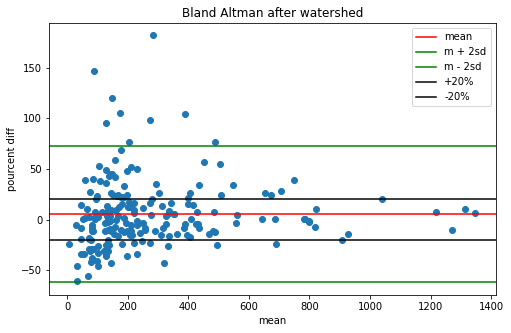

In [6]:
mean = []
for i in range(len(truth)):
    subliste = []
    subliste.append(truth[i])
    subliste.append(sous_seg[i])
    mean.append(np.mean(subliste))


#plt.hist(difference,bins='fd')


f = plt.figure(figsize=(8,5))
axes = plt.gca()
moy = np.mean(pourcent)
sd = np.std(pourcent)
print(moy)
plt.axhline(moy, c='r', label='mean')
plt.axhline(moy + 2*sd, c='green', label = 'm + 2sd' )
plt.axhline(moy - 2*sd, c='green', label = 'm - 2sd' )
plt.axhline(20, c='black', label = '+20%' )
plt.axhline(-20, c='black', label = '-20%' )
plt.scatter(mean, pourcent)
#plt.xlim(0, 500)
plt.xlabel('mean')
plt.ylabel('pourcent diff')
plt.legend()
plt.title('Bland Altman after watershed')

In [5]:
cpt = 0
for item in pourcent : 
    if item < 20 and item > -20 : 
        cpt += 1
cpt

NameError: name 'pourcent' is not defined